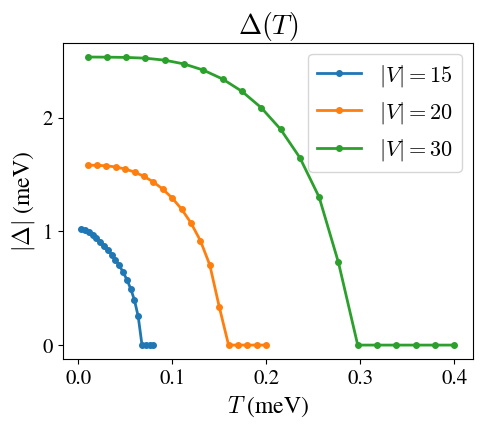

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"

# 
def read_posthoc(npz_path):
    z = np.load(npz_path)
    T   = np.asarray(z["Ts"], float)
    ok  = np.asarray(z["success"], bool)
    d0  = np.asarray(z["d0_re"], float) + 1j*np.asarray(z["d0_im"], float)
    return T, ok, d0

#  
base = "fig3"
V_list = [15, 20, 30]
paths = {V: os.path.join(base, f"V={V}", "posthoc_results.npz") for V in V_list}

# 
fig, ax = plt.subplots(figsize=(5.0, 4))
ax.set_facecolor('none')        

missing = []
for V in sorted(V_list):
    path = paths[V]
    if not os.path.isfile(path):
        missing.append(path)
        continue

    T, ok, d0 = read_posthoc(path)

    # sort by T just in case
    idx = np.argsort(T)
    T, ok, d0 = T[idx], ok[idx], d0[idx]

    # successful solutions
    ax.plot(1000*T[ok], np.abs(1000*d0[ok]), label=fr"$|V|={V}$", lw=2, marker="o", ms=4)

    # failed points (if any), faint markers (match x-scaling)
    if (~ok).any():
        ax.plot(1000*T[~ok], np.abs(1000*d0[~ok]), "x", alpha=0.35, ms=5)

if missing:
    print("Warning: missing files:\n  " + "\n  ".join(missing))
  
ax.set_xlabel(r"$T$ (meV)",fontsize=17)
ax.set_ylabel(r"$|\Delta|$ (meV)",fontsize=17)
 
ax.legend(fontsize=16)
plt.tight_layout()
plt.xticks([0,0.1,0.2,0.3,0.4],fontsize=15)
plt.yticks([0,1,2],fontsize=15)
plt.title("$\Delta(T)$",fontsize=20)

plt.savefig("figs/fig3.pdf",bbox_inches='tight')
 